# Load packages 

In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

### Import data 

In [28]:

clean_df = pd.read_csv('Customer_Analysis_Case_Study/Data/Data_Marketing_Customer_Analysis_Round3.csv')

### Get overview of data 

In [29]:
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10689 entries, 0 to 10688
Data columns (total 25 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Unnamed: 0                     10689 non-null  int64 
 1   region                         10689 non-null  object
 2   customer_lifetime_value        10689 non-null  int64 
 3   response                       10689 non-null  object
 4   coverage                       10689 non-null  object
 5   education                      10689 non-null  object
 6   effective_to_date              10689 non-null  object
 7   month                          10689 non-null  object
 8   employment_status              10689 non-null  object
 9   gender                         10689 non-null  object
 10  income                         10689 non-null  int64 
 11  location_code                  10689 non-null  object
 12  marital_status                 10689 non-null  object
 13  m

# Activities 4

#- Get the numeric data into dataframe called `numerical` and categorical columns in a dataframe called `categoricals`.
#(You can use np.number and np.object to select the numerical data types and categorical data types respectively)
#- Now we will try to check the normality of the numerical variables visually
#- Use seaborn library to construct distribution plots for the numerical variables
#- Use Matplotlib to construct histograms
#- Do the distributions for different numerical variables look like a normal distribution 
#- For the numerical variables, check the multicollinearity between the features. Please note that we will use the column `total_claim_amount` later as the target variable.
#- Drop one of the two features that show a high correlation between them (greater than 0.9). If there is no pair of features that have a high correlation, then do not drop any features.

### create numerical and catergorial frame 

In [30]:
numerical = clean_df.select_dtypes('int64') # asign numerics to new object
categoricals = clean_df.select_dtypes('object')

In [31]:
#Check 
#numerical.info
#categoricals.info

### Check the normality of the numerical variables visually

In [ ]:
# Seaborn
sns.pairplot(numerical) # command to produce pairwise plot
plt.show()  # comand. to output plot

/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

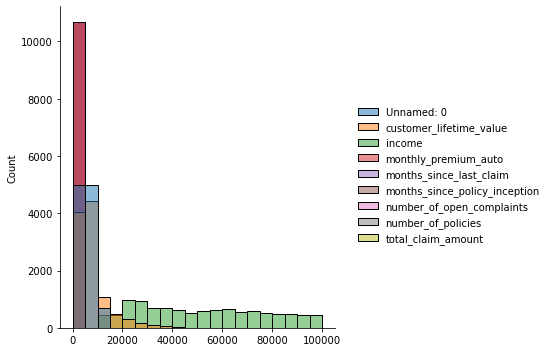

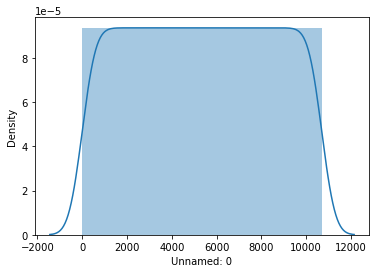

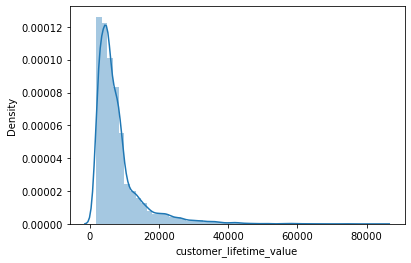

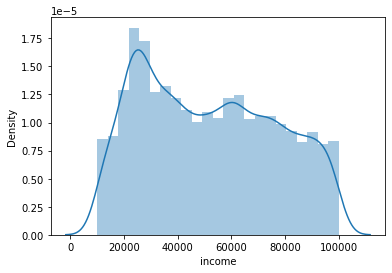

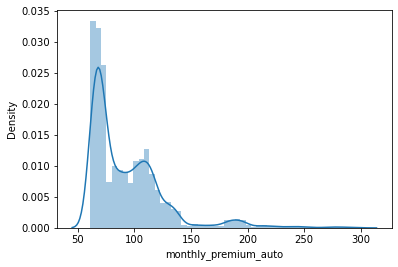

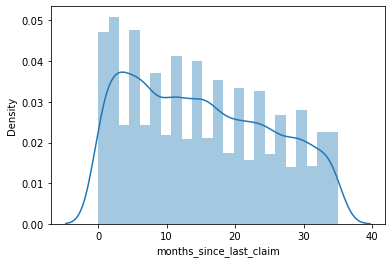

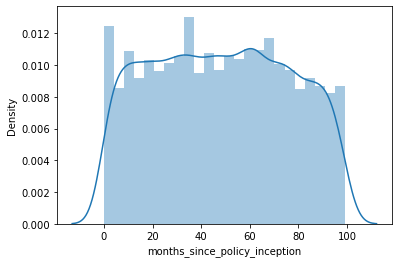

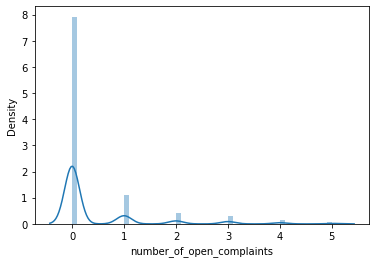

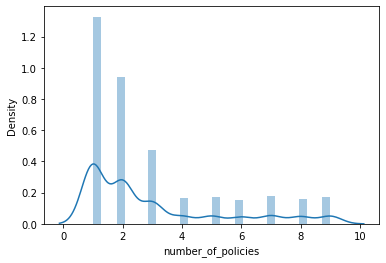

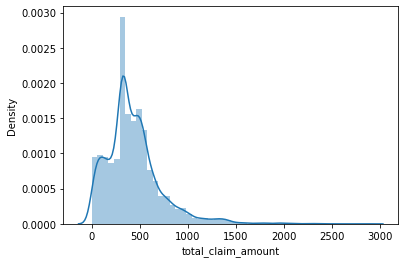

In [33]:
# Seaborn displot

sns.displot(numerical, bins=20) # produce pairwise plot and fix with of bins
#plt.show()

for column in numerical.columns:# write function to create distribution plot for all cols
    plt.figure()             
    sns.distplot(numerical[column])

array([[<AxesSubplot:title={'center':'Unnamed: 0'}>,
        <AxesSubplot:title={'center':'customer_lifetime_value'}>,
        <AxesSubplot:title={'center':'income'}>],
       [<AxesSubplot:title={'center':'monthly_premium_auto'}>,
        <AxesSubplot:title={'center':'months_since_last_claim'}>,
        <AxesSubplot:title={'center':'months_since_policy_inception'}>],
       [<AxesSubplot:title={'center':'number_of_open_complaints'}>,
        <AxesSubplot:title={'center':'number_of_policies'}>,
        <AxesSubplot:title={'center':'total_claim_amount'}>]],
      dtype=object)

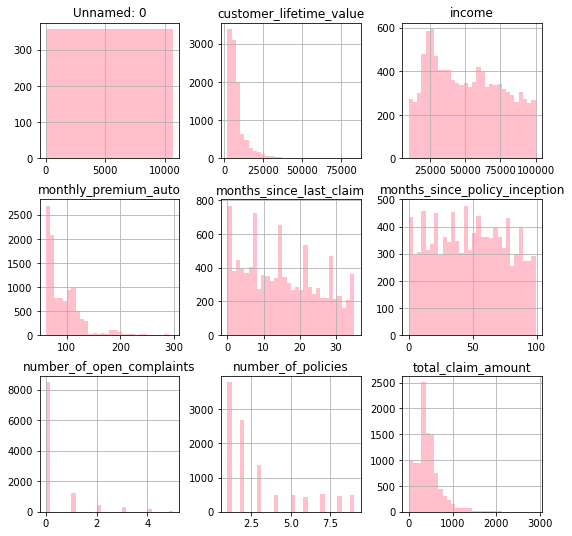

In [34]:
# Matplotlib

numerical.hist(figsize=(9,9), bins = 30, color = "pink")
#numerical.plt.hist2d(figsize=(9,9))

### Check the multicollinearity between the features.

#- no high correlation, subsequently non dropped

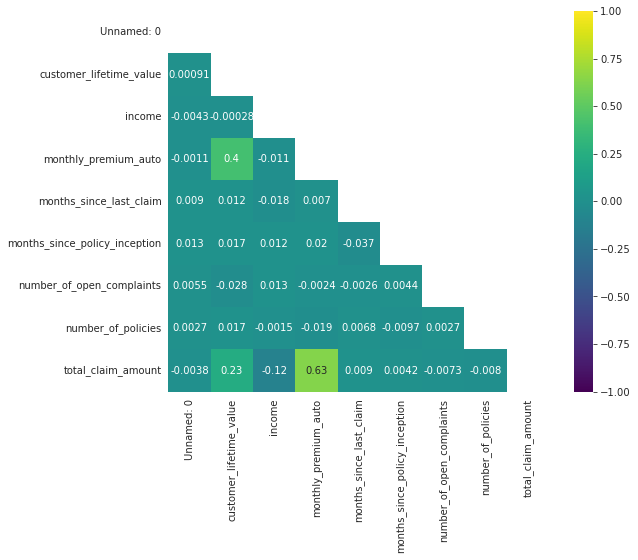

In [35]:
# Used heatmap cod eto perform task 

corr = numerical.corr() # parse df to correlation command
mask = np.zeros_like(corr) # mask all zeros 
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"): # hide mirroring part
    f, ax = plt.subplots(figsize=(9, 7)) # define plotsize
    ax = sns.heatmap(corr, mask=mask,cmap= 'viridis', vmin=-1,vmax=1,annot=True, square=True)

## Activity 5
#- Show a plot of the total number of responses.
#- Show a plot of the response rate by the sales channel.
#- Show a plot of the response rate by the total claim amount.
#- Show a plot of the response rate by income.
#- Don't limit your creativity!  plot any interesting findings/insights that describe some interesting facts about your data set and its variables.
#- Plot the Correlation Heatmap.
#- Clean your notebook and make it a readible and presentable with a good documentation that summarizes the Data Cleaning, Exploration(including plots) Steps that you have performed.

NameError: name 'response' is not defined

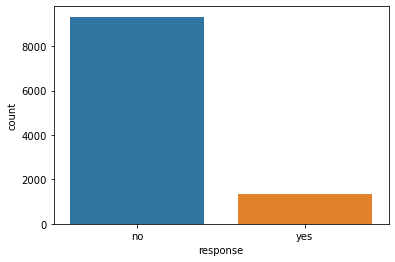

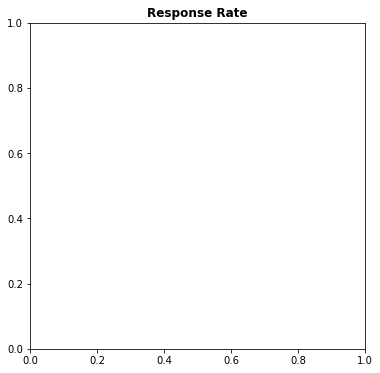

In [36]:
## Total number of responses 


categoricals['response'].value_counts() 

ax = sns.countplot(x="response", data=categoricals)

# create figure and axes
fig, ax1 = plt.subplots(figsize = (6,6))

# set title
ax1.set_title('Response Rate', fontweight='bold')

# plot the bar 
ax1.bar(response.index, response, color=('red','green'))


In [37]:
categoricals.columns

Index(['region', 'response', 'coverage', 'education', 'effective_to_date',
       'month', 'employment_status', 'gender', 'location_code',
       'marital_status', 'policy_type', 'policy', 'renew_offer_type',
       'sales_channel', 'vehicle_class', 'vehicle_size'],
      dtype='object')

In [38]:
categoricals['sales_channel'].value_counts()

agent          4019
branch         2975
call center    2099
web            1596
Name: sales_channel, dtype: int64

<AxesSubplot:title={'center':'Response rate by the sales channel'}, xlabel='sales_channel'>

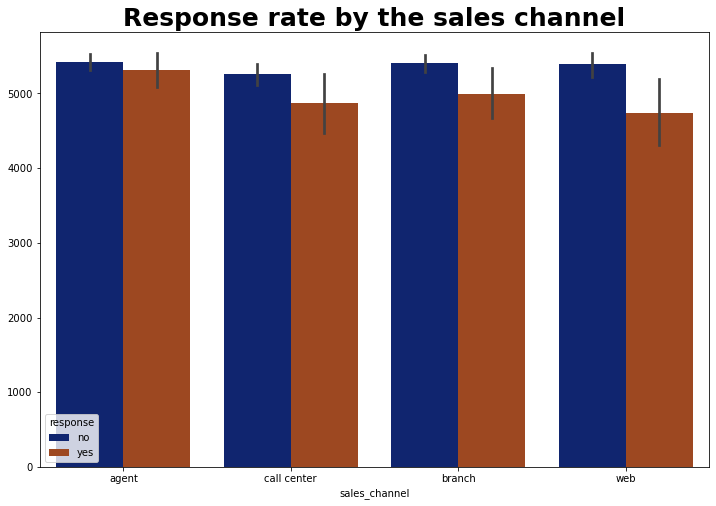

In [39]:
#  Show a plot of the response rate by sales chanel 

fig_bar, ax2 = plt.subplots(figsize = (12,8))

ax2.set_title('Response rate by the sales channel', size='25', fontweight='bold')
sns.barplot(x =clean_df['sales_channel'] , y = clean_df.index, hue = clean_df['response'],palette="dark", ax = ax2)

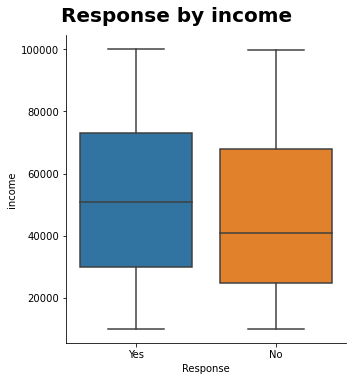

In [40]:
# response rate by income

fig_rate_by_income = sns.catplot(x='response', y = 'income', data = clean_df,  kind="box", margin_titles = True)
fig_rate_by_income.fig.suptitle('Response by income', size='20', fontweight='bold', y = 1.05)
fig_rate_by_income.set_xticklabels(['Yes', 'No'])
fig_rate_by_income.set_ylabels('income')
fig_rate_by_income.set_xlabels('Response')

## Playing 

In [ ]:
# reproduce as violinplot
fig_rate_by_income_2 = sns.violinplot(x='response', y = 'income', data = clean_df,  kind="box", palette = 'pink', margin_titles = True)
fig_rate_by_income_2.fig_rate_by_income_2.suptitle('Response by income', size='20', fontweight='bold', y = 1.05)
fig_rate_by_income_2.set_xticklabels(['Yes', 'No'])
fig_rate_by_income_2.set_ylabels('income')
fig_rate_by_income_2.set_xlabels('Response')

In [ ]:
# Show a plot of the response rate by the total claim amount

#fig_strip = sns.stripplot(x= 'response',
                #  y="total_claim_amount",
                  #data= clean_df)

fig_bar = sns.scatterplot(x="total_claim_amount",
                y='response',
                data=clean_df)

In [ ]:
fig_joint_2 = sns.jointplot(x='income', y='total_claim_amount', data=clean_df, hue ='monthly_premium_auto')
fig_joint_2.ax_marg_x.set_xlim(10000, 200000)
fig_joint_2.ax_marg_y.set_ylim(0, 5000)


In [ ]:
plt.scatter(x=numerical['income'], y=numerical['monthly_premium_auto'])
plt.show()